In [1]:
from graph_builder import bgraph
from MST import mst
from plot_clusters import pcluster
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
def prim_clustering(G, k):
    
    pred = mst.prim_algorithm(G)
    
    k = k - 1
        
    keys = list(pred.keys())
    edges = []
            
    for i in range(len(keys)):
        edges.append([G[keys[i]][pred[i+1]-1], i+1, pred[i+1]])
                                
    edges = sorted(edges, reverse=True)
    
    for j in range(k):
        edges[j] = [0, j+1, j+1] 
    
    return edges

0.8089434170360936


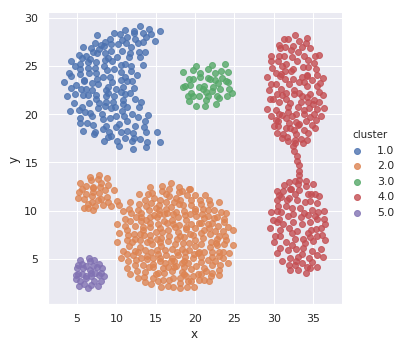

In [3]:
def k_clustering(k):
    
    G, ver = bgraph.build_graph("in/data.txt")
    edges = prim_clustering(G, k)    
    plot = pcluster(edges, ver)
    plot.show_clusters('cluster_prim')

    pclasses = plot.classes_list()
    tclasses = bgraph.read_classes('in/classes.txt')
    
    print(adjusted_rand_score(tclasses, pclasses))
    
k_clustering(5)